<a href="https://colab.research.google.com/github/SharonOBoyle/AI-Launchpad/blob/main/Day1_Assignment2_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 2: Unsupervised Learning with K-Means Clustering

Unsupervised Learning with K-Means Clustering

#### Objective:
The objective of this assignment is to help you understand and apply the principles of unsupervised learning using the K-Means clustering algorithm. You will work with the Iris dataset to perform clustering and evaluate the results.

#### Dataset:
You will use the Iris dataset, which contains information about iris flowers, including their sepal length, sepal width, petal length, and petal width. The dataset can be found in the `sklearn.datasets` module.

#### Tasks:
1. **Data Exploration and Preprocessing**
    - Load the Iris dataset and explore its structure.
    - Visualize the data to understand its distribution and structure.

2. **Apply K-Means Clustering**
    - Apply the K-Means clustering algorithm to the dataset.
    - Determine the optimal number of clusters using the Elbow method.

3. **Visualize the Clusters**
    - Use PCA (Principal Component Analysis) to reduce the data to 2D for visualization.
    - Visualize the clusters formed by K-Means and compare them with the true labels.

4. **Evaluate the Clustering**
    - Create a confusion matrix to compare the cluster labels with the true labels.
    - Discuss the clustering performance and the confusion matrix results.

5. **Write a Report**
    - Write a detailed report summarizing your findings, including data exploration, clustering application, visualization, and evaluation.
    - Include visualizations and code snippets where appropriate.

#### Additional Resources:
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

# **1. Data Exploration and Preprocessing**

Load the Iris dataset and explore its structure.
Visualize the data to understand its distribution and structure.

In [ ]:
# Load the dataset and explore its structure.

import pandas as pd

# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Explore its structure
# Create a DataFrame for easier manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target species as a column
iris_df['species'] = iris.target

# Map numerical species to their names
iris_df['species'] = iris_df['species'].map(dict(enumerate(iris.target_names)))

print(iris_df.head())  # Display the first few rows of the dataset
print("----------------------------------------------------------------------")
print(iris_df.describe())  # Summary statistics for numerical columns
print("----------------------------------------------------------------------")
print(iris_df['species'].value_counts())  # Count the number of samples per species

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
----------------------------------------------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.60

In [ ]:
type(iris)


sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.filename)

iris.csv


In [ ]:
print(iris.data_module)

sklearn.datasets.data


# Visualize the data

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


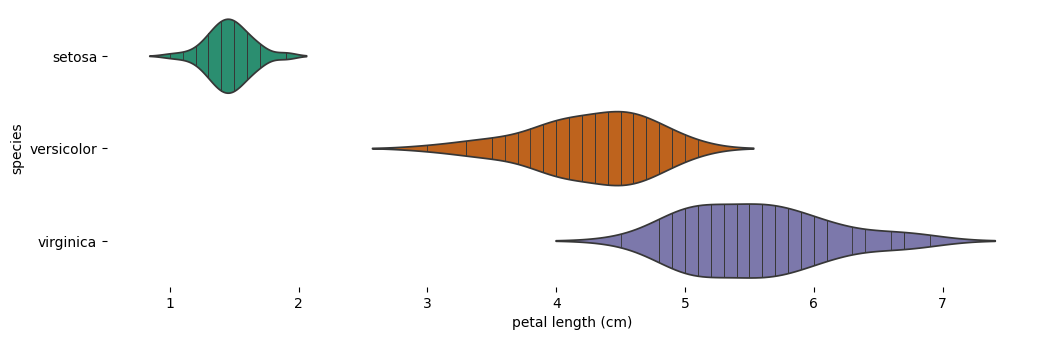

In [ ]:
# @title species vs petal length (cm)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(iris_df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(
    data=iris_df,
    x='petal length (cm)',
    y='species',
    inner='stick',
    hue='species',
    palette='Dark2',
    legend=False
)
sns.despine(top=True, right=True, bottom=True, left=True)

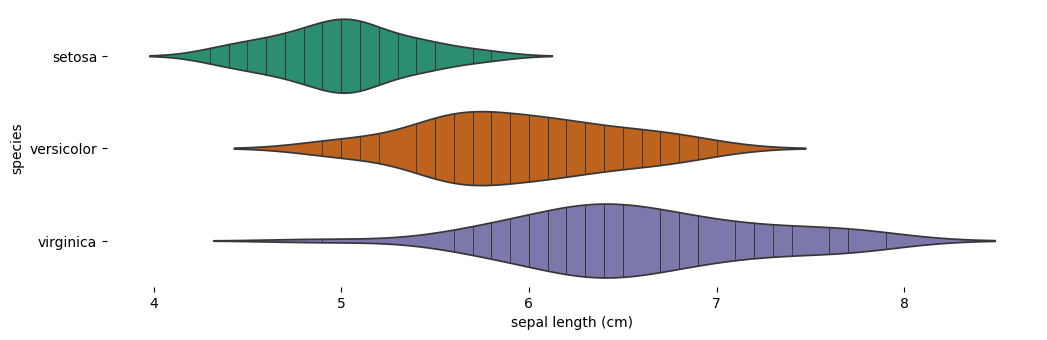

In [ ]:
# @title species vs sepal length (cm)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(iris_df['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(
    data=iris_df,
    x='sepal length (cm)',
    y='species',
    inner='stick',
    hue='species',
    palette='Dark2',
    legend=False
)
sns.despine(top=True, right=True, bottom=True, left=True)

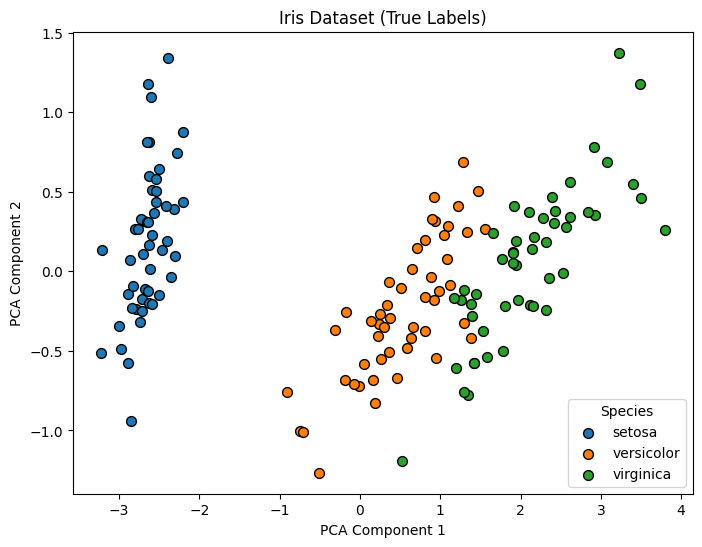

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(iris.data)

plt.figure(figsize=(8, 6))
for i, species in enumerate(iris.target_names):
    plt.scatter(
        reduced_data[iris.target == i, 0],  # PCA Component 1 for this species
        reduced_data[iris.target == i, 1],  # PCA Component 2 for this species
        label=species,                      # Label for the legend
        s=50, edgecolor='k'
    )

# Plot the data
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Iris Dataset (True Labels)')
plt.legend(title='Species')
plt.show()

In [ ]:
loadings = pca.components_
print("Principal Component Loadings:\n", loadings)

Principal Component Loadings:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


**Explanation of the PCA Components**

After fitting PCA, the loadings are available in the components_ attribute of the PCA object. Each row of this matrix corresponds to a principal component, and each column corresponds to an original feature.

Each value represents the contribution of a feature to that principal component.

For PC1 ([ 0.36138659 -0.08452251  0.85667061  0.3582892 ]), , the corresponding features contribute as follows:

* Sepal length: 0.36
* Sepal width: -0.08
* Petal length: 0.86
* Petal width:  0.36

The magnitude of each loading shows how much a feature contributes to the component. Features with larger absolute values are more important.

For the example above, PC1 is most influenced by:

* Petal length (0.86): Largest contributor.
* Petal width  (0.36): Secondary contributor.
* Sepal length (0.36): Secondary contribution.
* Sepal width: (0.08): Minimal contribution.

Thus, PC2 primarily captures variation related to petal dimensions, particularly petal width, with some influence from petal width and sepal length.

For PC2 ([ 0.65658877  0.73016143 -0.17337266 -0.07548102]), the corresponding features contribute as follows:

* Sepal length: 0.65
* Sepal width: 0.73
* Petal length: -0.17
* Petal width: -0.07

PC2 is most influenced by:

1. Sepal width (0.73): Largest contributor.
2. Sepal length (0.65): Secondary contributor.
3. Petal length (-0.17): Moderate contribution.
4. Petal width (-0.07): Minimal contribution.

Thus, PC2 primarily captures variation related to sepal dimensions, particularly sepal width, with some influence from sepal width and a smaller contribution from petal length.



In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by PC1:", explained_variance[0])
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by PC2:", explained_variance[1])

Variance Explained by PC1: 0.924618723201734
Variance Explained by PC2: 0.05306648311706378


If PC1 explains 92% of the variance, it indicates that the petal dimensions dominate the overall variation in the dataset.


# **2. Apply K-Means Clustering**

* Determine the optimal number of clusters using the Elbow method.
* Apply the K-Means clustering algorithm to the dataset.


**Determine the optimal number of clusters using the Elbow method:**

The **Elbow Method** is a popular technique to determine the optimal number of clusters (k) for K-Means clustering. It evaluates the within-cluster sum of squares (WCSS), also known as inertia, which measures the sum of squared distances between each data point and its cluster center.

The idea is to plot WCSS for different values of k and look for the "elbow" point, where the rate of decrease in WCSS slows down significantly. This point suggests the optimal number of clusters.

**Steps to Implement the Elbow Method**
1. Compute WCSS for Different Values of k
Run K-Means clustering for a range of cluster numbers and record the WCSS for each value of k.

2. Plot the WCSS vs. k
The plot shows how WCSS decreases as the number of clusters increases. The "elbow" point is where the decrease flattens out.


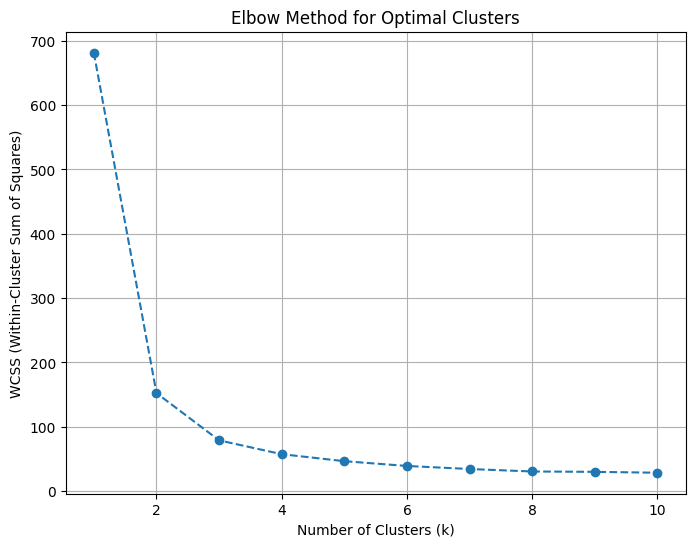

In [ ]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

This shows that the optimal number of clusters is 3

**Apply the K-Means clustering algorithm to the dataset:**

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


# **3. Visualize the Clusters**

* Use PCA (Principal Component Analysis) to reduce the data to 2D for visualization.
* Visualize the clusters formed by K-Means and compare them with the true labels.

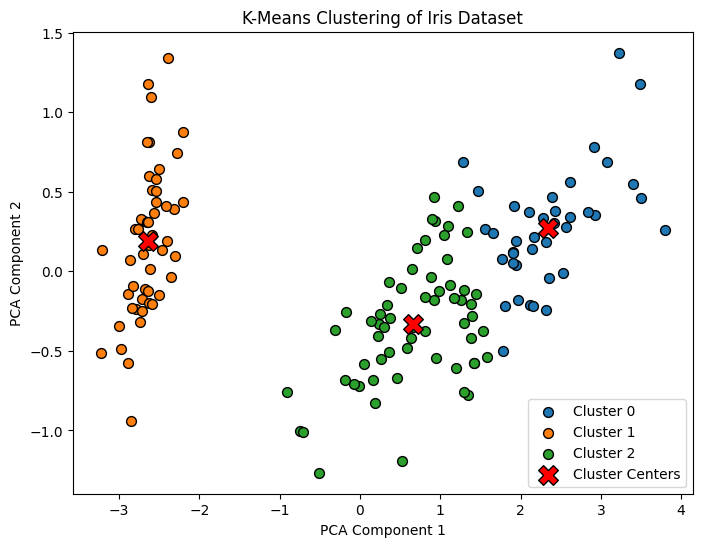

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)

# Get the cluster labels
labels = kmeans.labels_

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(iris.data)

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
for i in range(3):  # Loop over each cluster
    plt.scatter(
        reduced_data[labels == i, 0],  # PCA Component 1 for cluster i
        reduced_data[labels == i, 1],  # PCA Component 2 for cluster i
        label=f'Cluster {i}',         # Label for the legend
        s=50, edgecolor='k'
    )

# Plot the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', marker='X', s=200,
    label='Cluster Centers', edgecolor='k'
)

# Add labels, title, and legend
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()


**The scatter plot displays:**

* Three clusters of points, each in a unique color.
* Cluster centers, marked with red Xs.
* A legend identifying the clusters and the cluster centers.

This visualization helps understand how K-Means grouped the data and where the cluster centers are positioned relative to the points.

**Cluster Centers**

The 3 rows in the DATA correspond to the centroids of the 3 clusters.

**Cluster 0 Interpretation:**

[6.85384615 3.07692308 5.71538462 2.05384615]

This cluster has flowers with:
* Long sepals (6.85 cm) and moderate sepal width (3.07 cm).
* Long petals (5.71 cm) and wide petals (2.05 cm).

This likely corresponds to the **virginica species**.

**Cluster 1 Interpretation:**

[5.006      3.428      1.462      0.246     ]

This cluster has flowers with:
* Short sepals (5.01 cm) and wide sepal width (3.43 cm).
* Very short petals (1.46 cm) and narrow petals (0.25 cm).

This likely corresponds to the **setosa species**, which is distinct due to its small petal size.

**Cluster 2 Interpretation:**

[5.88360656 2.74098361 4.38852459 1.43442623]

This cluster has flowers with:
* Moderate sepals (5.88 cm in length, 2.74 cm in width).
* Moderate petals (4.39 cm in length, 1.43 cm in width).

This likely corresponds to the **versicolor species.**

**Key Insights**

Clusters Represent Groups of Similar Flowers:

* The cluster centers summarize the average characteristics of the flowers in each cluster.

* Mapping to Iris Species: Based on the feature values, we can tentatively map the clusters to species:
  * Cluster 0: Virginica (long petals, wide petals).
  * Cluster 1: Setosa (short petals, narrow petals).
  * Cluster 2: Versicolor (intermediate petal size and width).

**K-Means Clustering Objective:**

* K-Means finds the cluster centers by minimizing the sum of squared distances between data points and their assigned cluster center.
* These centers represent the "typical" flower in each cluster.

# 4. Evaluate the Clustering

* Create a confusion matrix to compare the cluster labels with the true labels.
* Discuss the clustering performance and the confusion matrix results.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import mode

# Load the Iris dataset
iris = load_iris()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)
labels = kmeans.labels_

# Map cluster labels to actual labels
mapped_labels = np.zeros_like(labels)
for cluster in range(3):
    mask = (labels == cluster)
    if np.any(mask):  # Ensure there are samples in the cluster
        mapped_labels[mask] = mode(iris.target[mask], keepdims=True).mode[0]

# Compute the confusion matrix
cm = confusion_matrix(iris.target, mapped_labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


**Confusion matrix results**

The given confusion matrix shows the results of comparing the K-Means clustering labels with the actual labels of the Iris dataset. Here's a brief explanation:

**Key Insights**

Setosa (First Row):

* All 50 samples of Setosa were correctly assigned to Cluster 0.
* Indicates perfect clustering for this species.

Versicolor (Second Row):

* 47 samples of Versicolor were correctly assigned to Cluster 1.
* 3 samples of Versicolor were misclassified into Cluster 2.

Virginica (Third Row):

* 36 samples of Virginica were correctly assigned to Cluster 2.
* 14 samples of Virginica were misclassified into Cluster 1.

**Summary of Performance**

Setosa: Perfectly clustered with no misclassifications.

Versicolor: Mostly clustered correctly, with minor misclassifications into Cluster 2.

Virginica: Somewhat mixed, with a significant portion of samples assigned to Cluster 1.

**Overall Observations**

* Clustering is very accurate for Setosa, likely because it is well-separated from the other species.
* Versicolor and Virginica exhibit overlap, making them harder to separate, which is common due to their similar petal and sepal measurements.